libraries to install: yfinance, mplfinance

In [37]:
import datetime
import pandas as pd
import time
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

In [38]:
stocks1 = pd.read_csv('scripts/dw1.csv')
stocks2 = pd.read_csv('scripts/dw2.csv')
stocks3 = pd.read_csv('scripts/dw3.csv')
stocks4 = pd.read_csv('scripts/dw4.csv')

list_stocks1 = list(stocks1['CODE'])
list_stocks2 = list(stocks2['CODE'])
list_stocks3 = list(stocks3['CODE'])
list_stocks4 = list(stocks4['CODE'])

period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

interval: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [40]:
for script in list_stocks4:
    try:
        data_hourly = yf.download(script, period="3mo", interval="1h")
    except:
        print("Hourly Error: ", script)
    try:
        data_daily = yf.download(script, period="1y", interval="1d")
    except:
        print("Daily Error: ", script)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [17]:
data_hourly = yf.download("AIAENG.NS", period="3mo", interval="1h")
data_daily = yf.download("AIAENG.NS", period="1y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-30 09:15:00+05:30,3607.100098,3631.000000,3570.050049,3580.850098,3580.850098,9655
2023-11-30 10:15:00+05:30,3580.850098,3608.399902,3576.399902,3595.199951,3595.199951,4983
2023-11-30 11:15:00+05:30,3595.199951,3595.199951,3586.500000,3591.899902,3591.899902,133


In [17]:
data_hourly = yf.download("AIAENG.NS", period="3mo", interval="1h")
data_daily = yf.download("AIAENG.NS", period="1y", interval="1d")
data_weekly = yf.download("AIAENG.NS", period="10y", interval="1wk")
data_monthly = yf.download("AIAENG.NS", period="10y", interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [36]:
mpf.plot(data_daily, type='candle', title="AIAENG - Daily", style='yahoo', 
         figscale = 2.0, figratio = (1, 0.3), volume=True, savefig="test2.png")

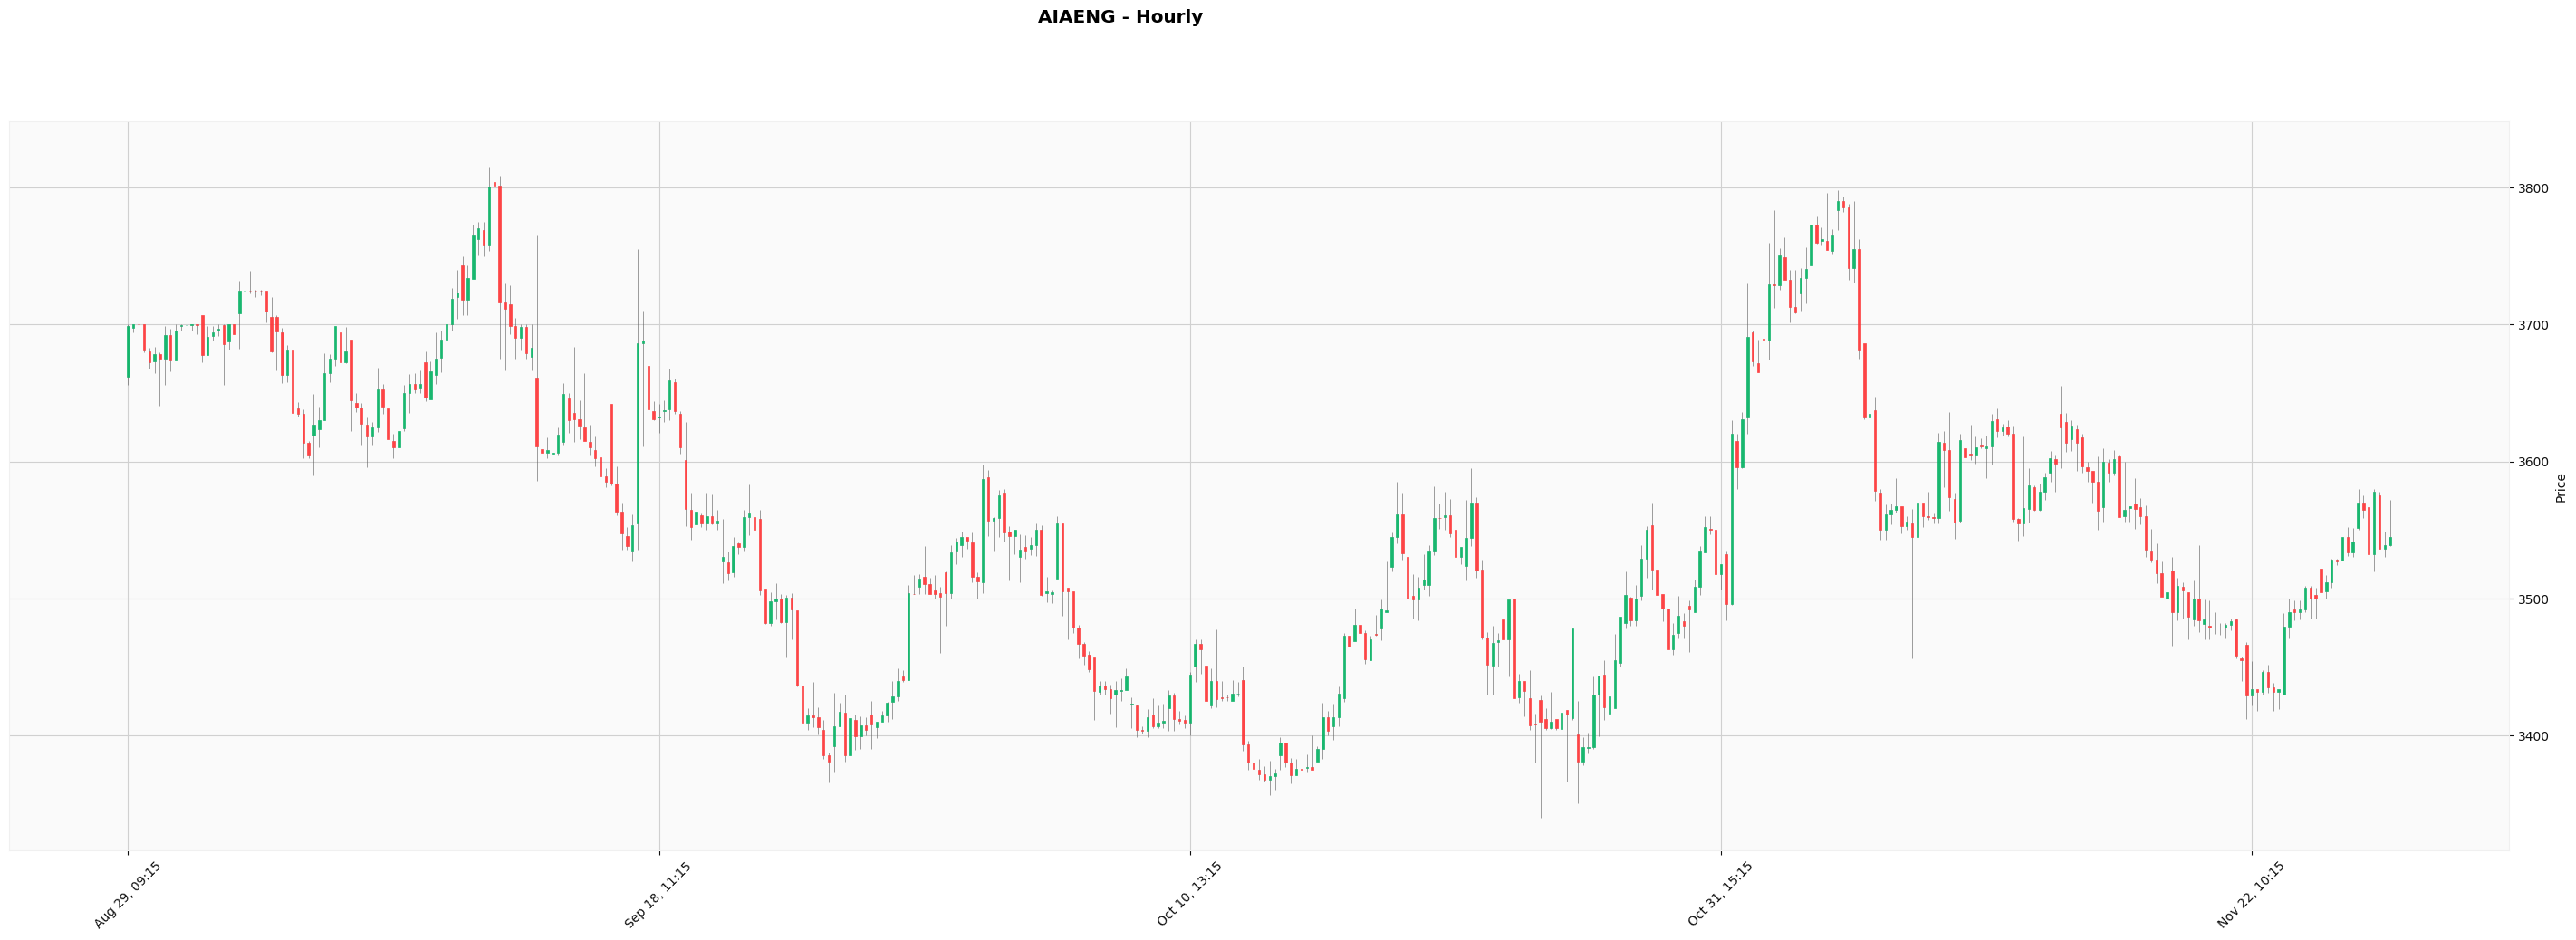

In [26]:
mpf.plot(data_hourly, type='candle', title="AIAENG - Hourly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

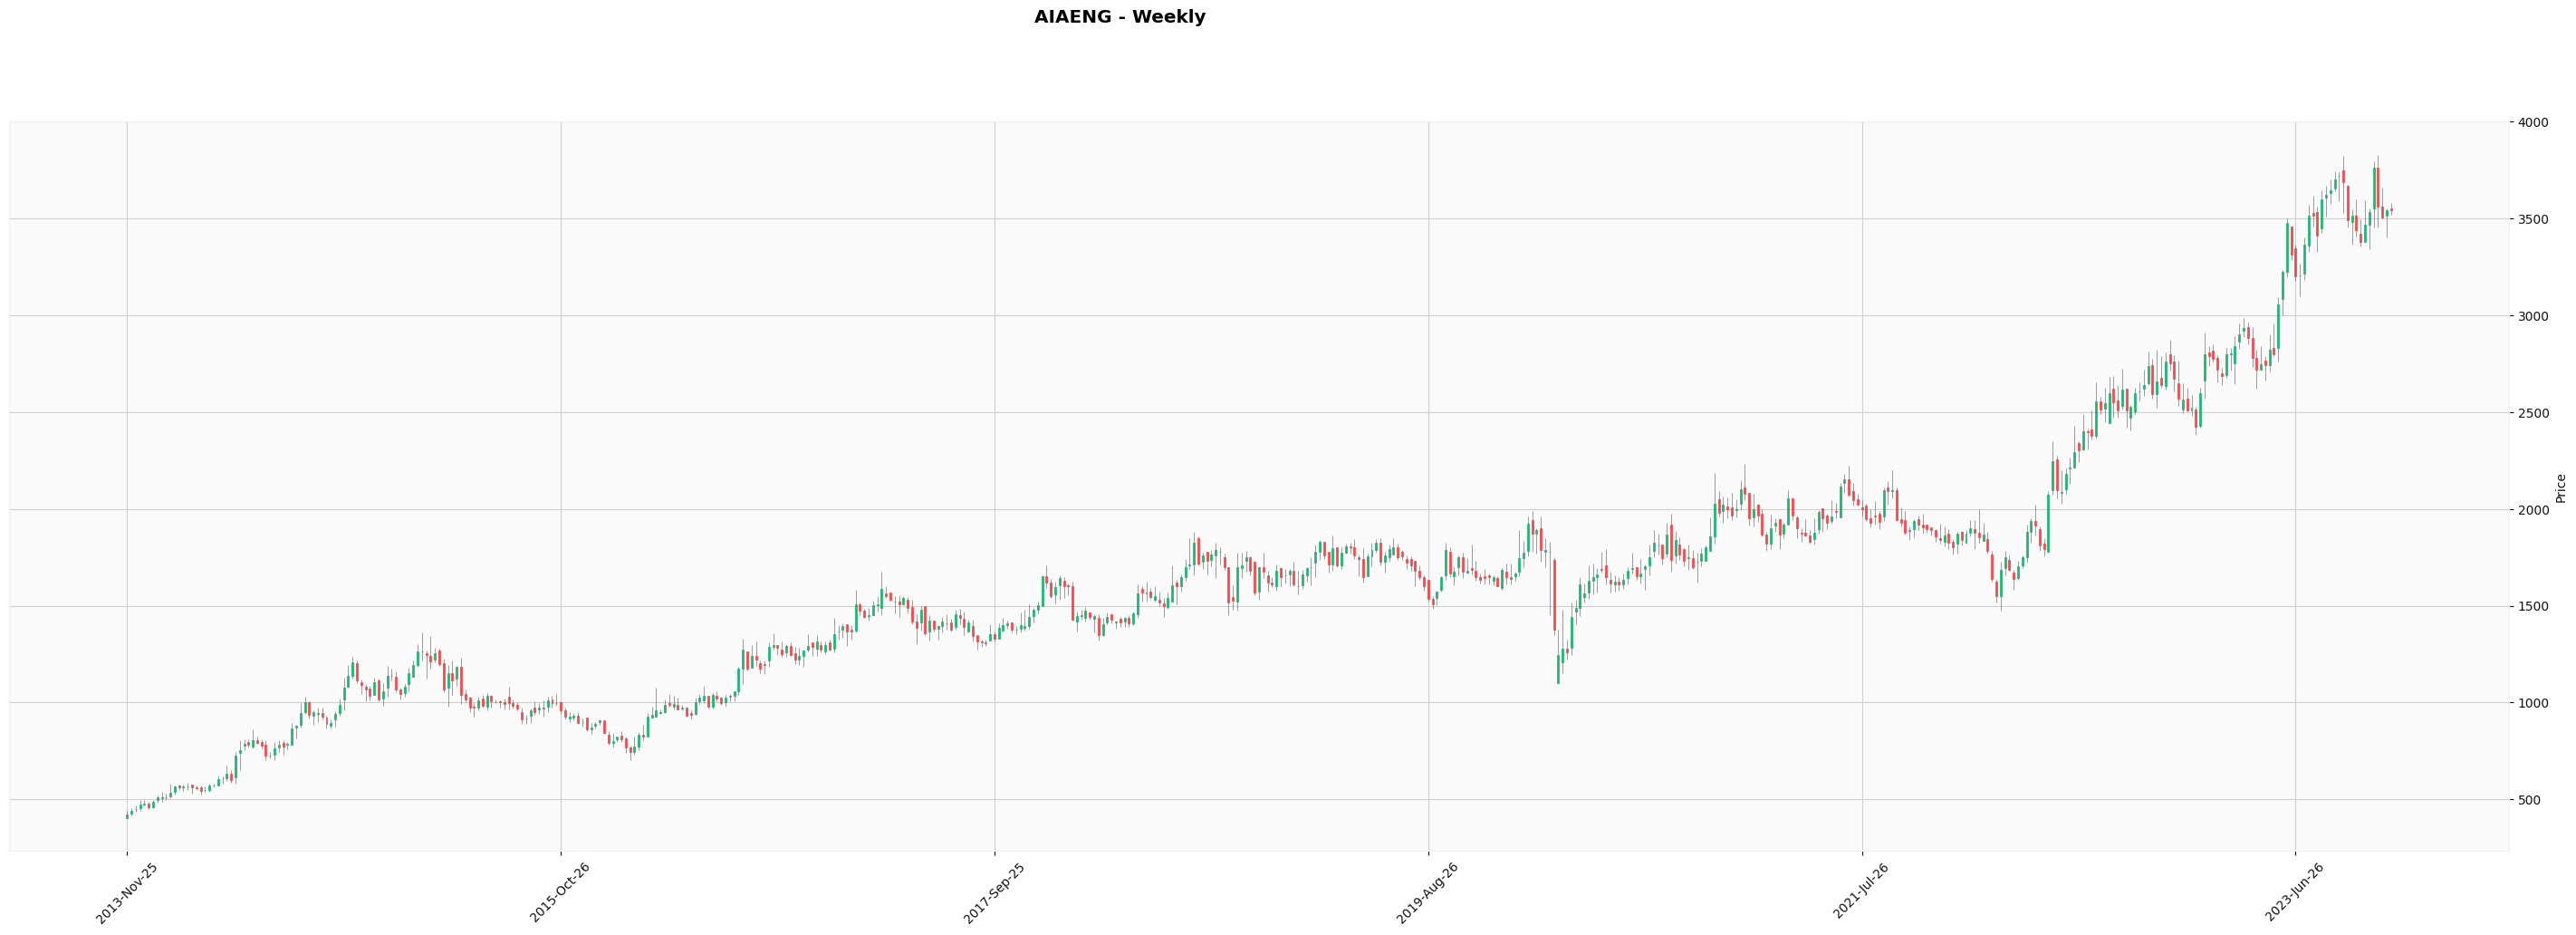

In [27]:
mpf.plot(data_weekly, type='candle', title="AIAENG - Weekly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

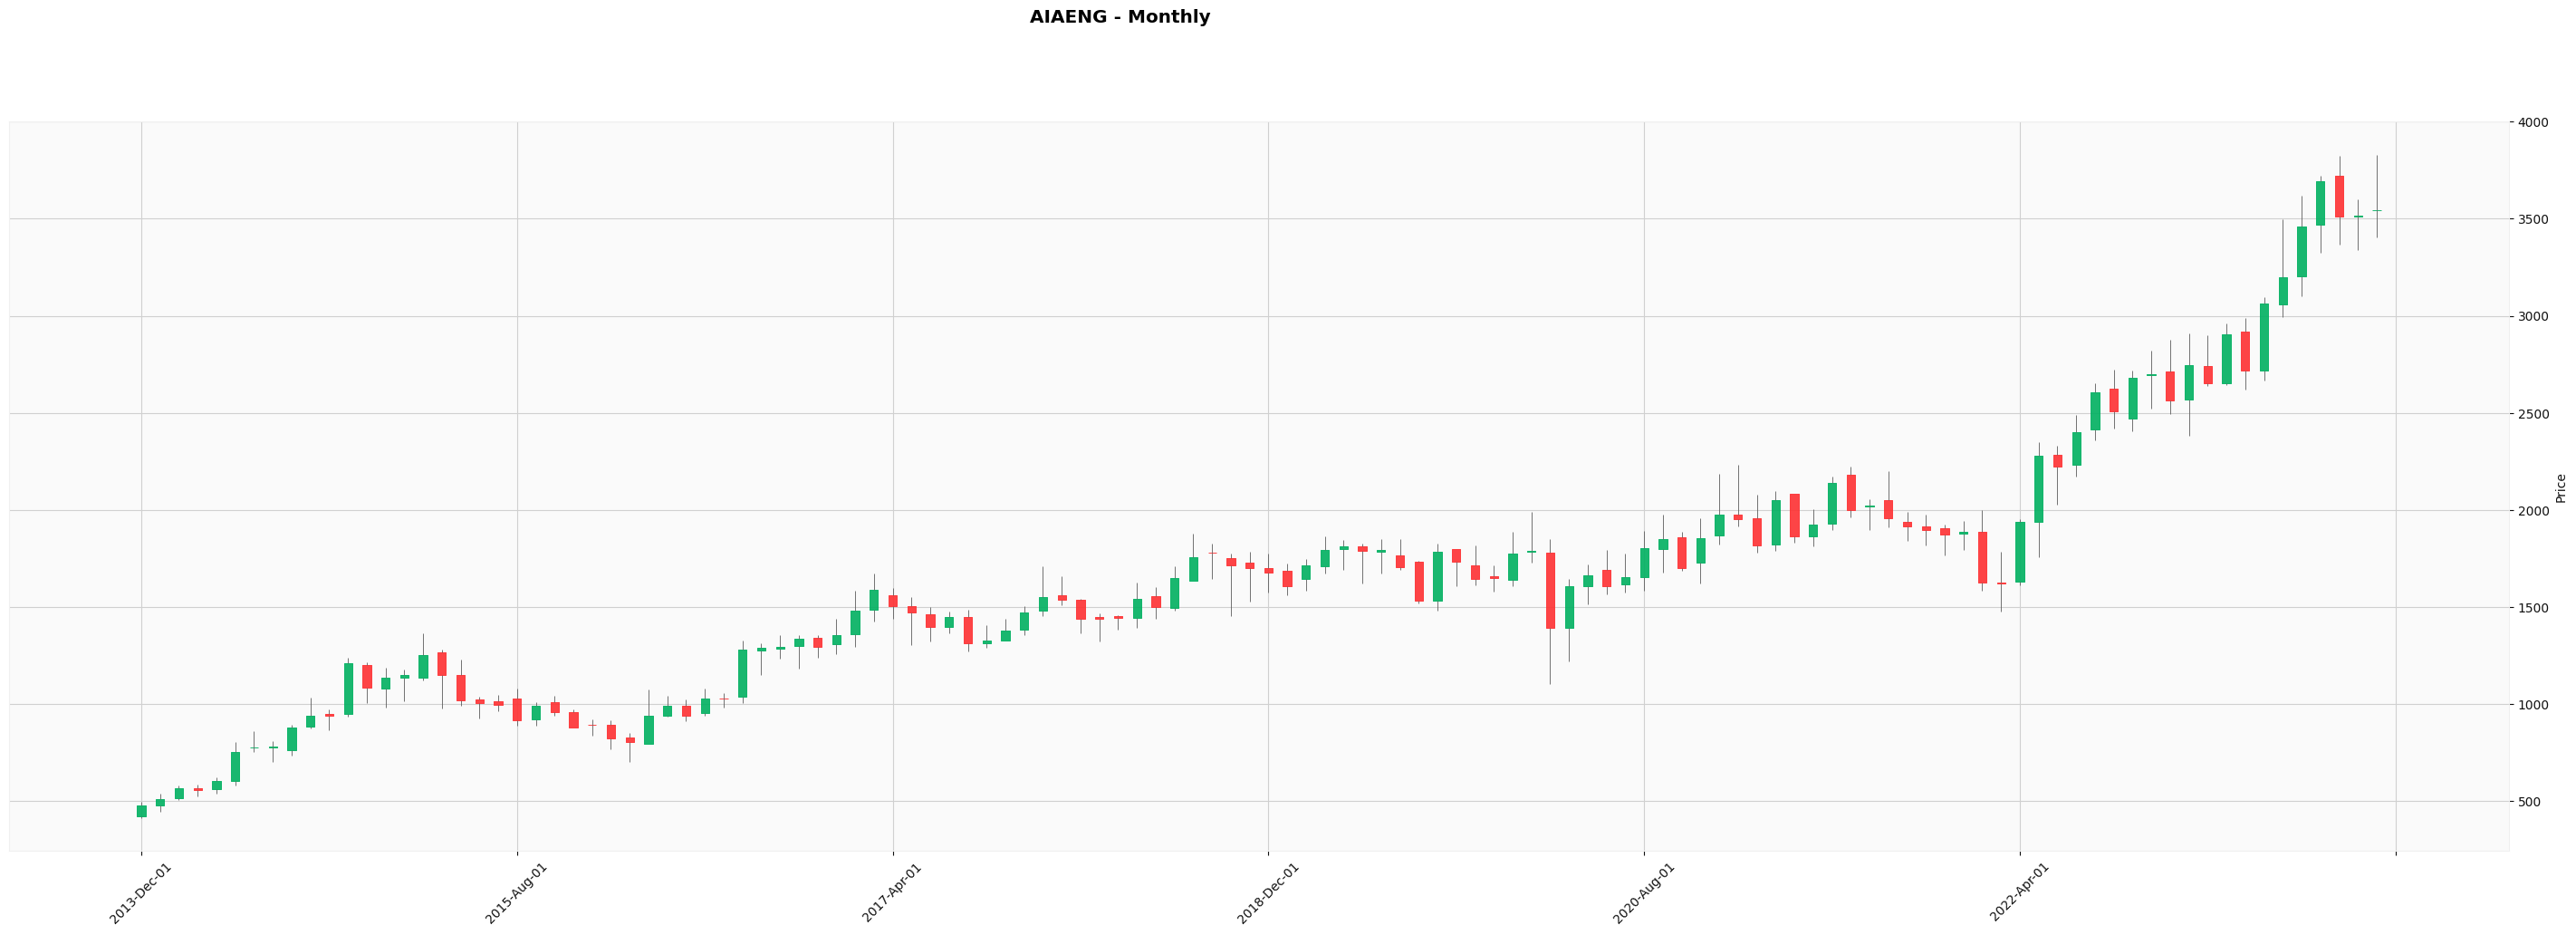

In [28]:
mpf.plot(data_monthly, type='candle', title="AIAENG - Monthly", style='yahoo', figscale = 2.0, figratio = (1, 0.3))

now combine two images into a pdf and send it over telegram

In [35]:
from PIL import Image

In [49]:
image1 = Image.open(r'test.png')
image2 = Image.open(r'test1.png')
image3 = Image.open(r'test2.png')

im1 = image1.convert('RGB')
im2 = image2.convert('RGB')
im3 = image3.convert('RGB')

imagelist = [im2,im3,im2,im3,im2,im3,im2,im3,im2,im3,im2,im3]

In [50]:
im1.save(r'test.pdf',save_all=True, append_images=imagelist)

In [51]:
from telegram import Bot
from telegram import InputFile
import json

In [52]:
with open('info.json', 'r') as file:
    data = json.load(file)

In [53]:
bot_token = data['telegram_bot_token']
chat_id = data['telegram_chat_id']

pdf_file_path = 'test.pdf'

In [54]:
bot = Bot(token=bot_token)

In [58]:
with open(pdf_file_path, 'rb') as pdf_file:
    await bot.send_document(chat_id=chat_id, document=InputFile(pdf_file))